# Zusammenfassung von Userplots

## Imports aus pysrl

In [1]:
from config import *

## Laden der notwendigen Daten

In [2]:
dfs = get_user_dfs(load_transformed_data())  # The dfs we need for all plots
sorted_pages = load_learn_pages('learn_pages_sorted')  # for one type of plot

## Jetzt die eigentlichen Plots

### Definiere Parameter

In [13]:
kwargs = {'plot': True, 'save': True, 'n_min': 0}  # only save relevant here
save = kwargs['save']
n = 100 # Number of users to show

### Zeitlicher Verlauf der Lerntypen

In [ ]:
labels = ["Tests", "Übungen", "Lesen"]
mapper = [0, 1, 1, 2, 2, 2]
spath = os.path.join(results_path, 'LerntypenVerlauf')
figs1 = timefig(dfs[:n], labels, f_typ="LearnType", mapping=mapper, 
                path=spath, **kwargs)

### Zeitlicher Verlauf der Schwierigkeit

In [ ]:
labels = ["Leicht", "Mittel", "Schwer"]
spath = os.path.join(results_path, 'SchwierigkeitVerlauf')
figs2= timefig(dfs[:n], labels, f_typ="difficulty", path=spath, **kwargs)

### Zeitlicher Verlauf der Korrektheit von Aufgaben

In [ ]:
labels = ["falsch", "teilw.", "richtig"]
spath = os.path.join(results_path, 'KorrektheitVerlauf')
figs3 = timefig(dfs[:n], labels, f_typ="ResponsTask", path=spath, **kwargs)

### Zeitlicher Verlauf der Testpunkte

In [ ]:
labels = ["Testpunkte"]
spath = os.path.join(results_path, 'TestpunkteVerlauf')
figs4 = timefig(dfs[:n], labels, f_typ="TestResQuant", path=spath, **kwargs)

### Zeitlicher Verlauf der Sekunden pro Seite

In [ ]:
labels = ["SekProSeite"]
figs5 = spentfig(dfs[:n], clabel=labels[0], save=save, plot=True,
                 cpath=results_path)

### Reihenfolge der Seiten im Vergleich zur Lernumgebung

In [ ]:
figs6 = []
for i, user_df in enumerate(dfs[:n]):
    spath = os.path.join(results_path, 'ActionOrder', str(i))
    figs6.append(plot_lines(user_df, sorted_pages, save=save, path=spath))

### Standard Lineplots der User

0
1
2
4
5
7
8
9
10
11
15
16
18
20
23
27
28
29
30
31
32
33
34
35
36
38
39
40
41
42
43
44
46
49
50
52
55
56
57
60
61
63
65
66
67
69
70
73
75
76
77
78
79
80
81


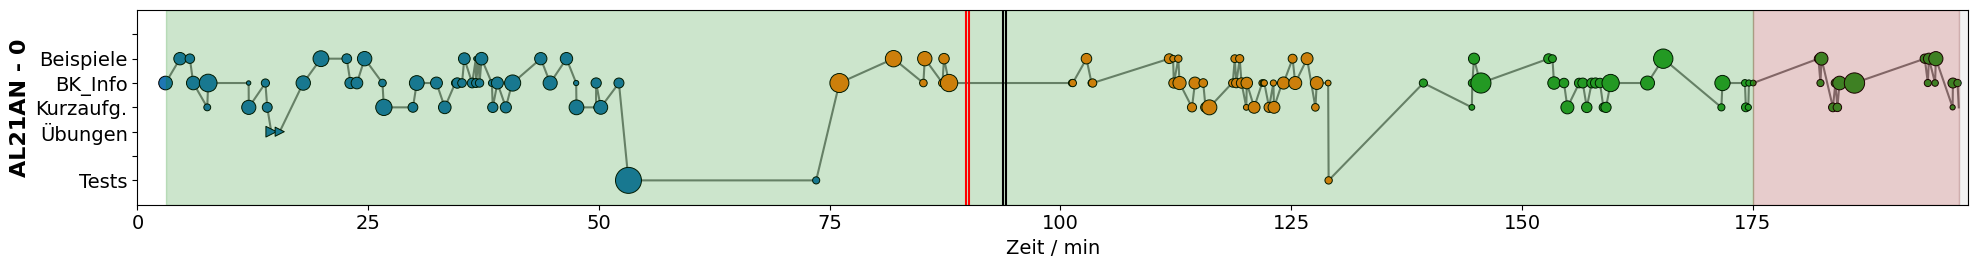

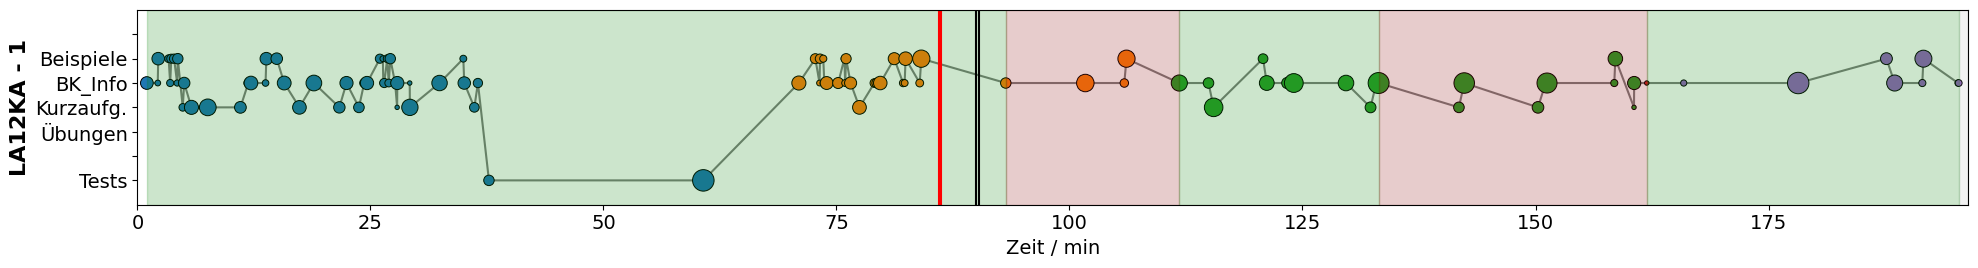

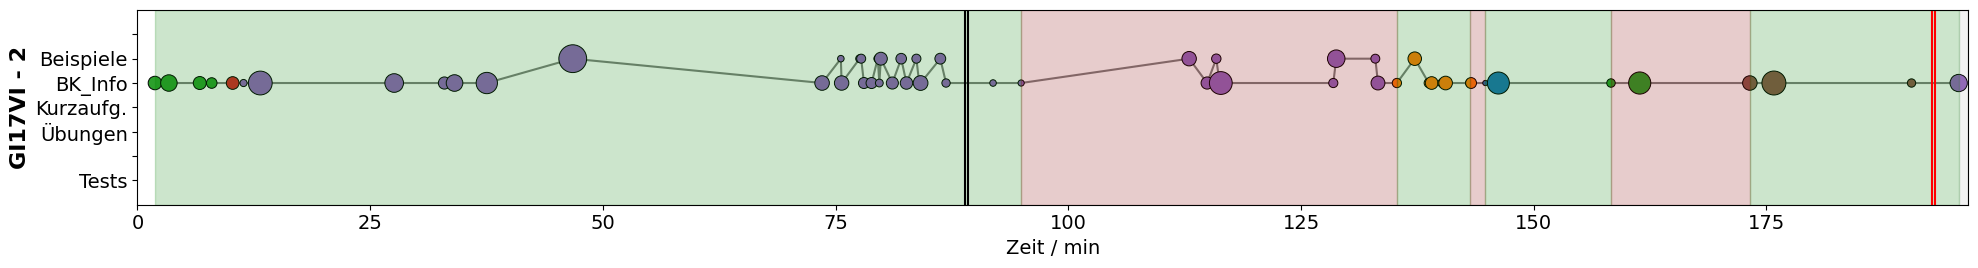

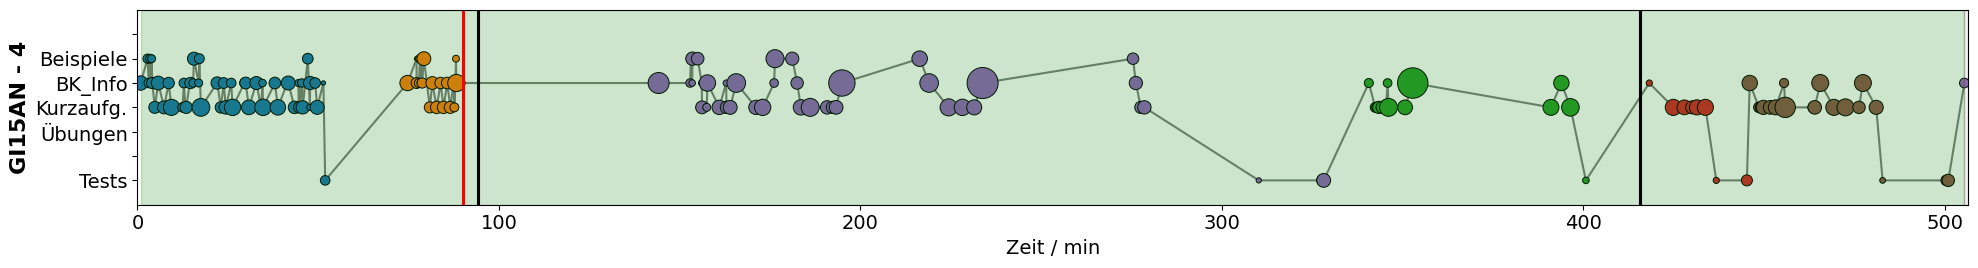

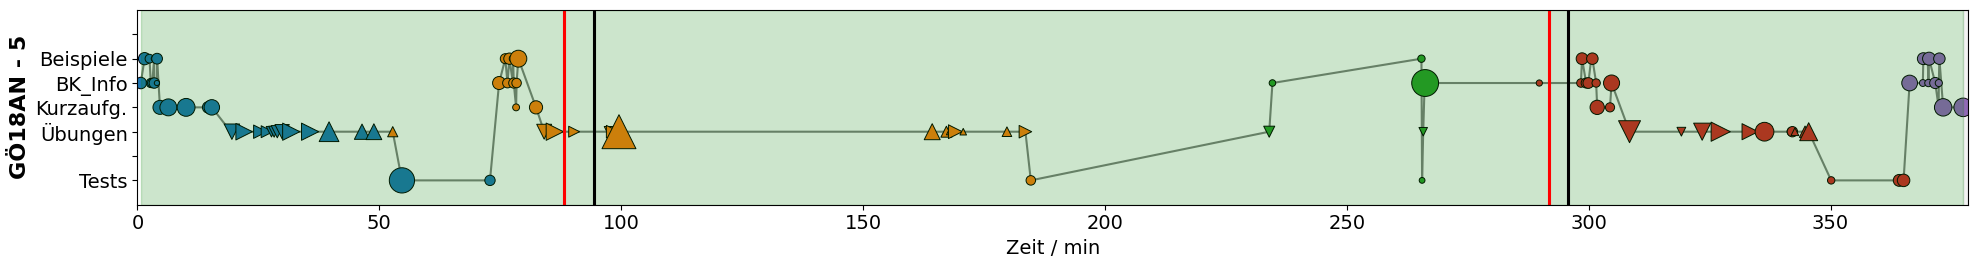

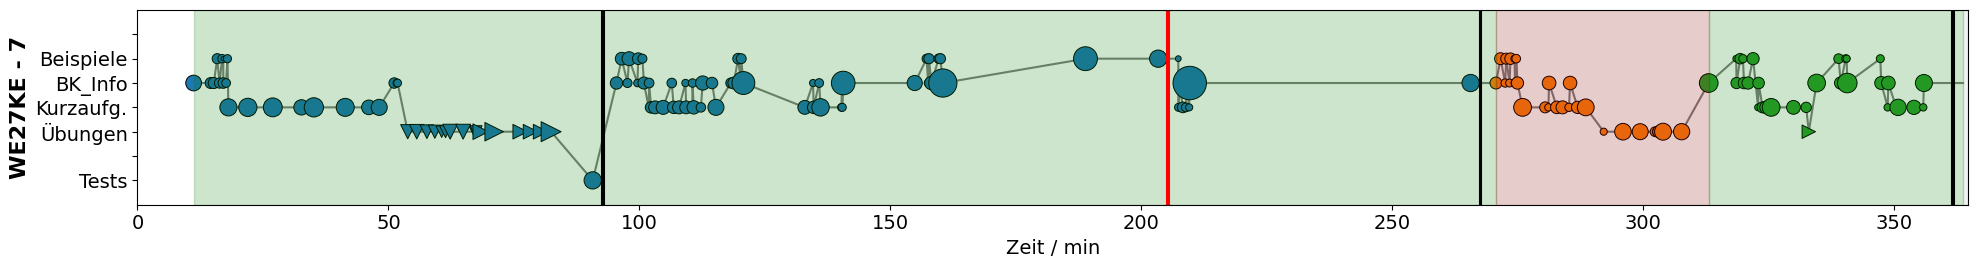

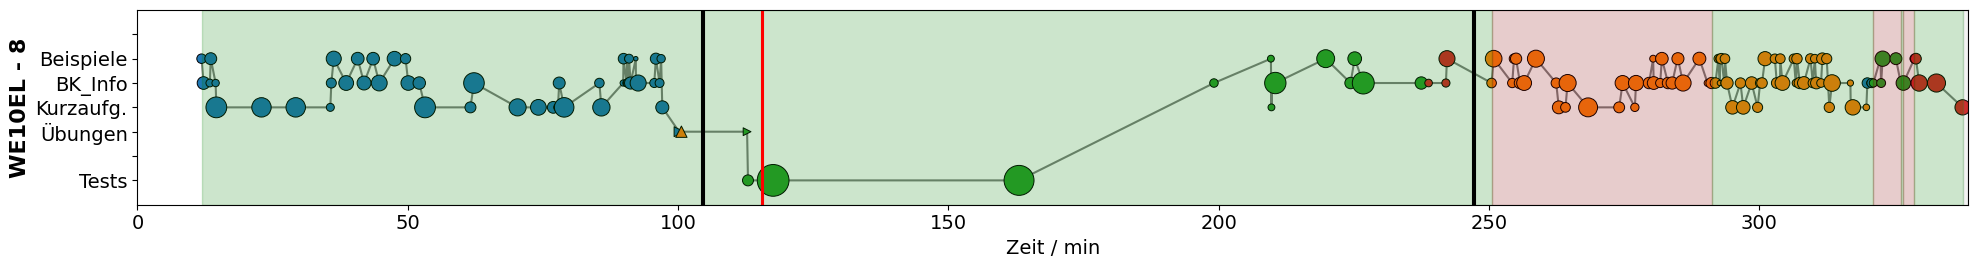

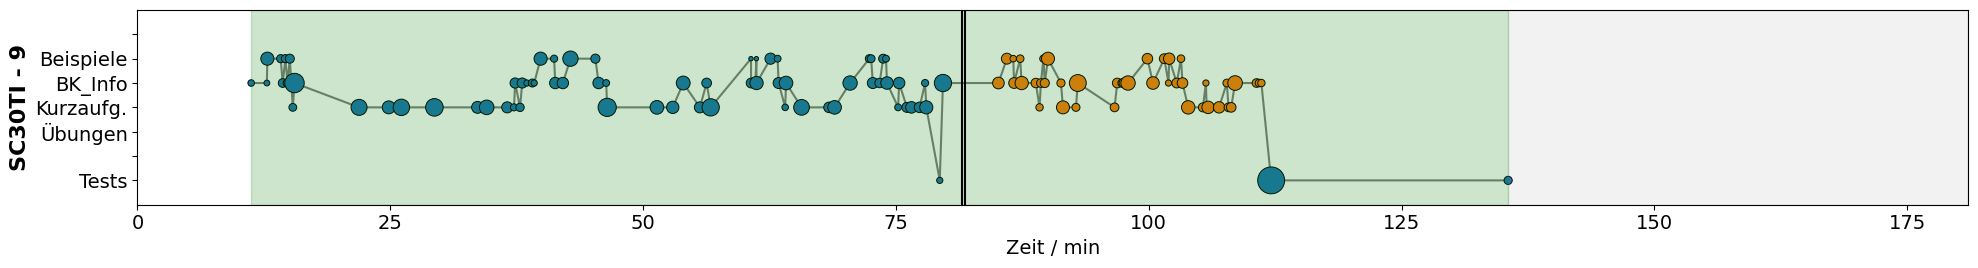

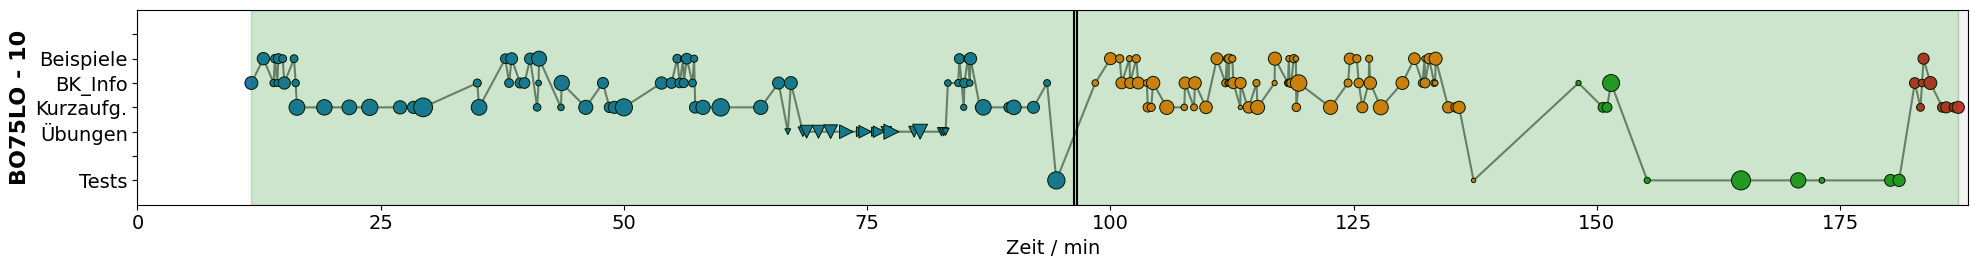

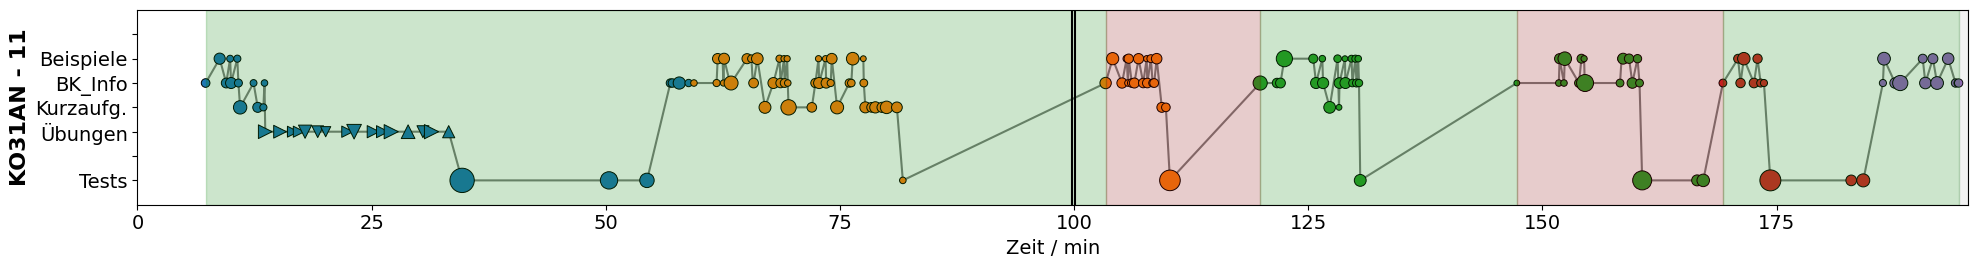

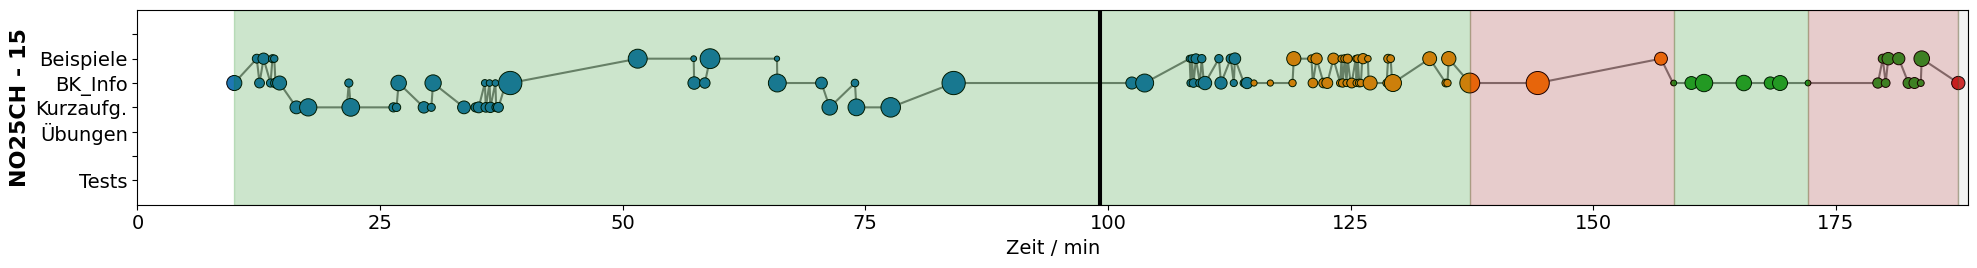

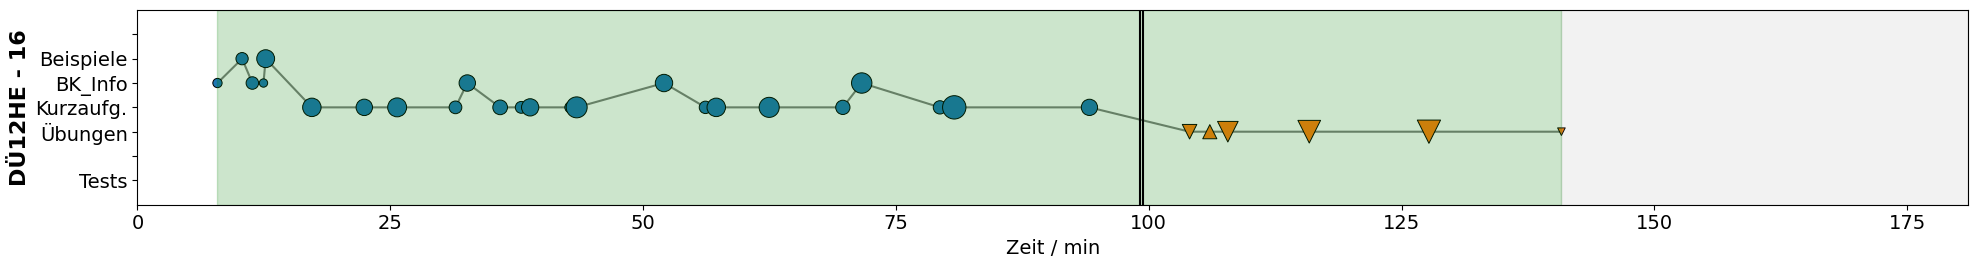

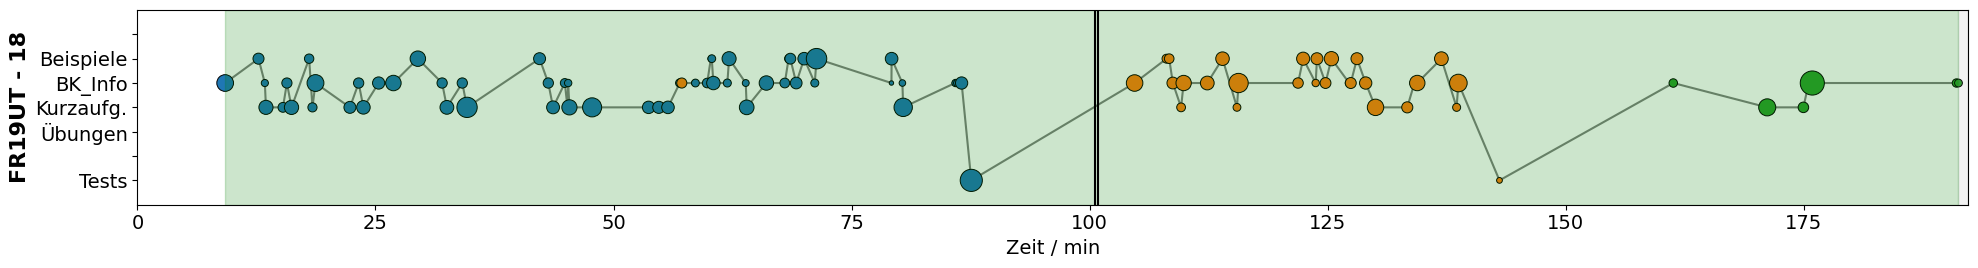

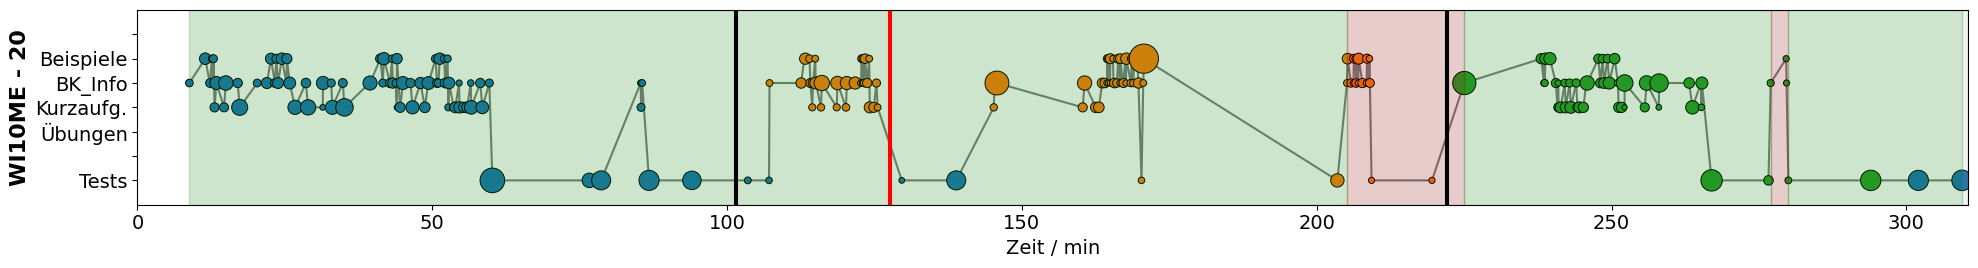

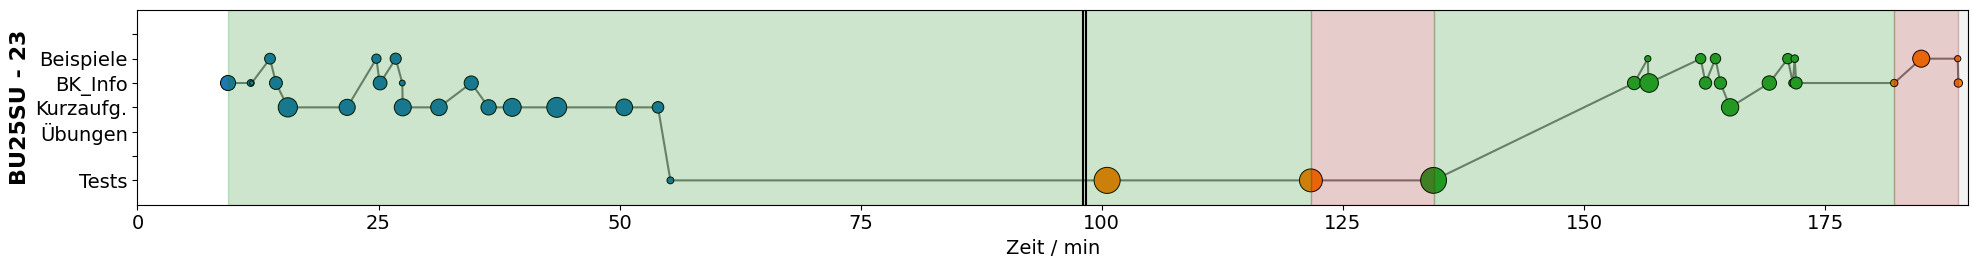

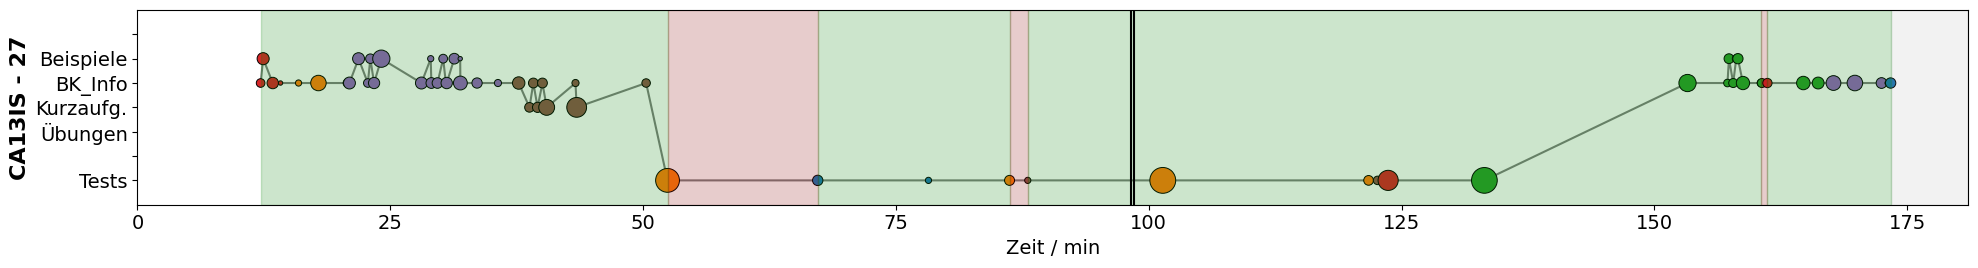

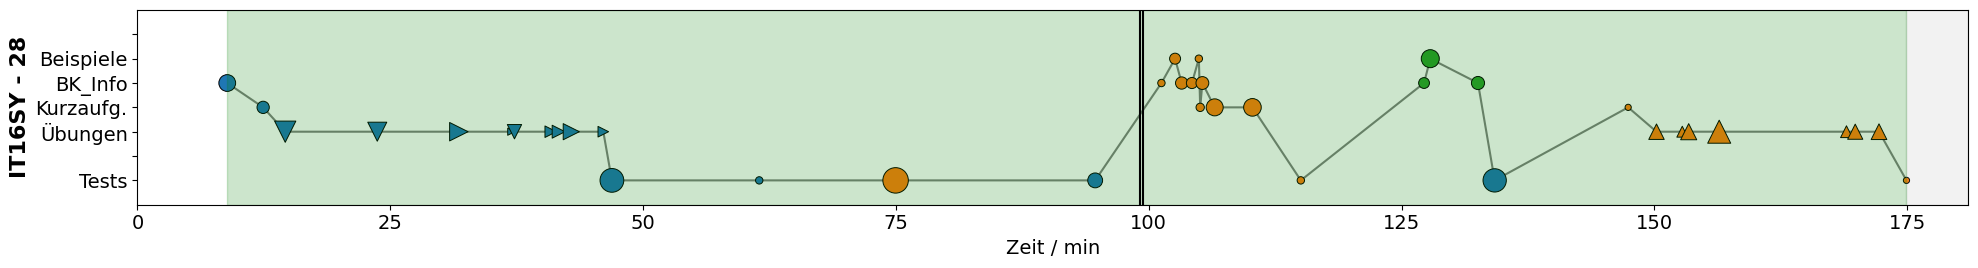

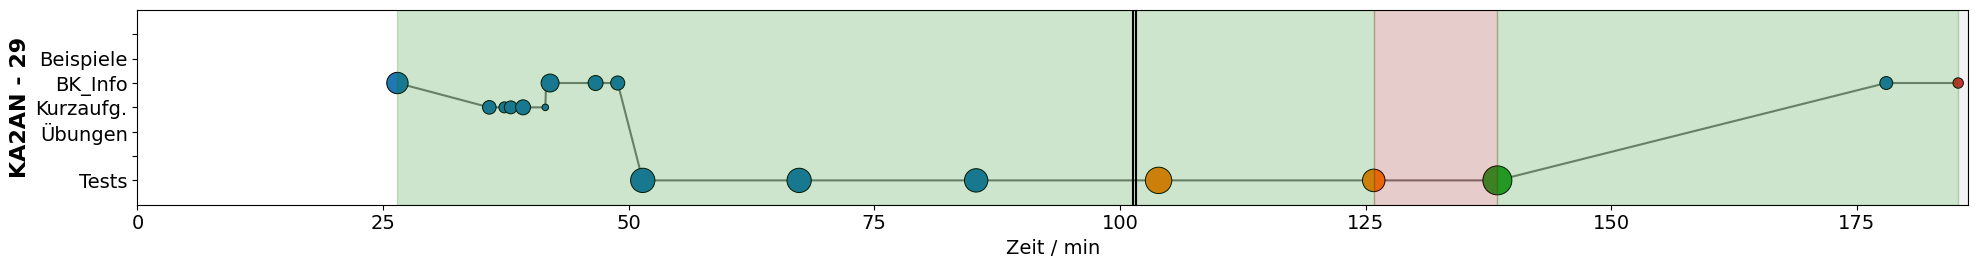

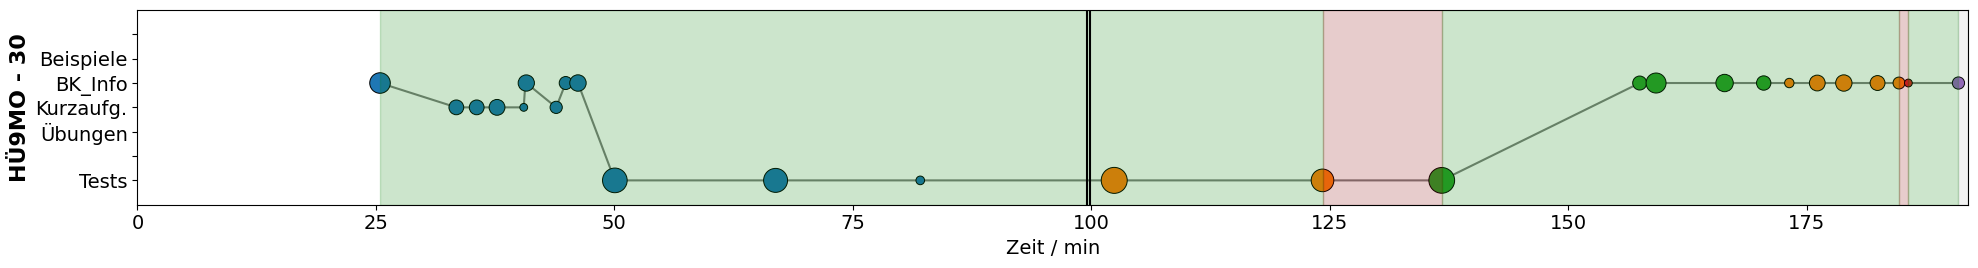

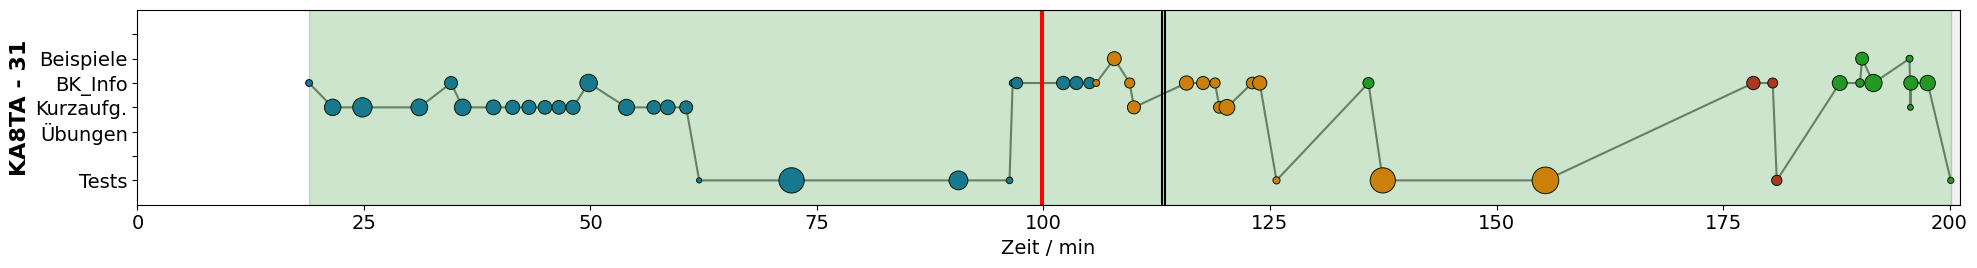

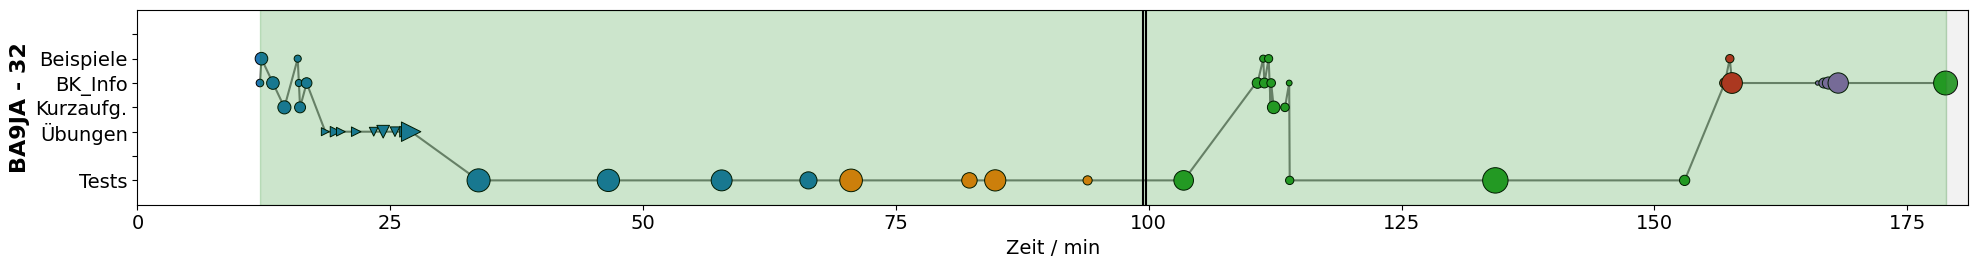

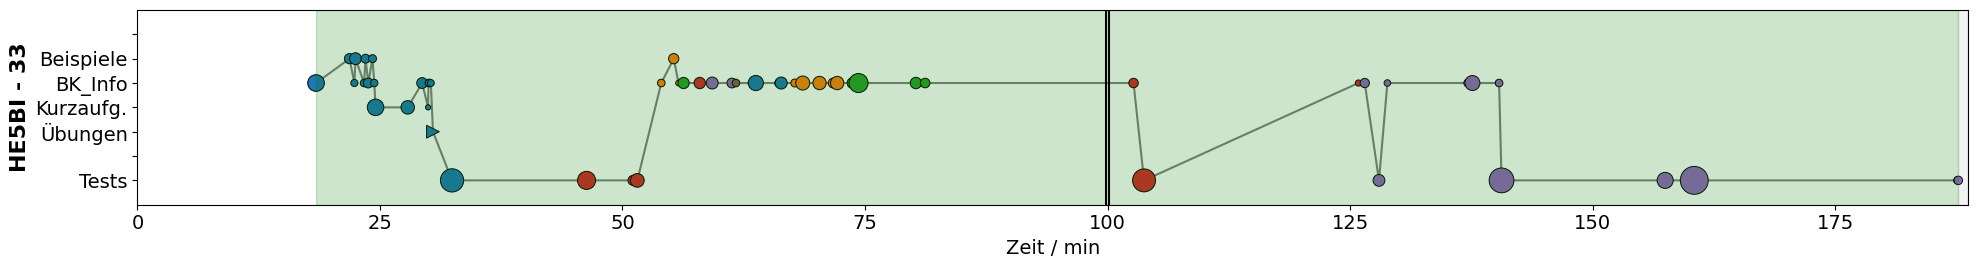

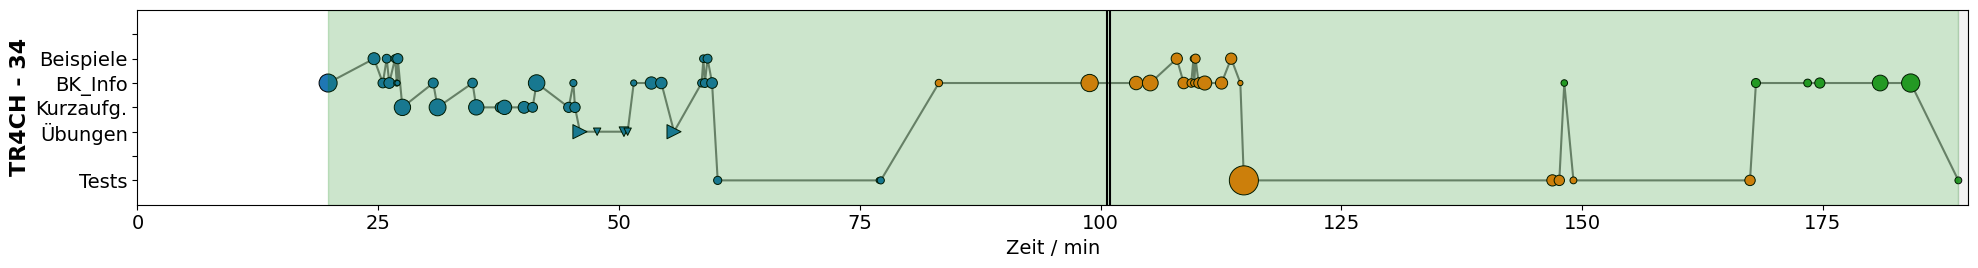

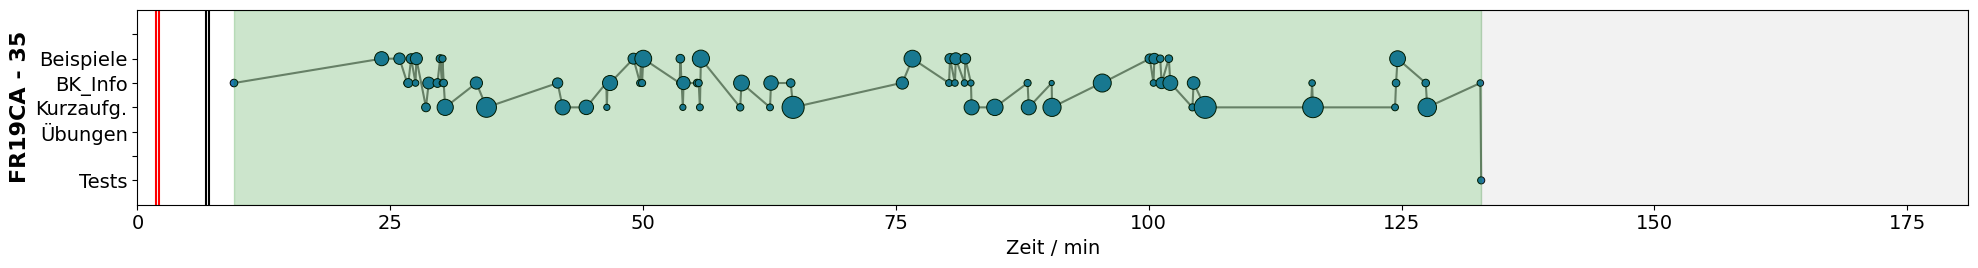

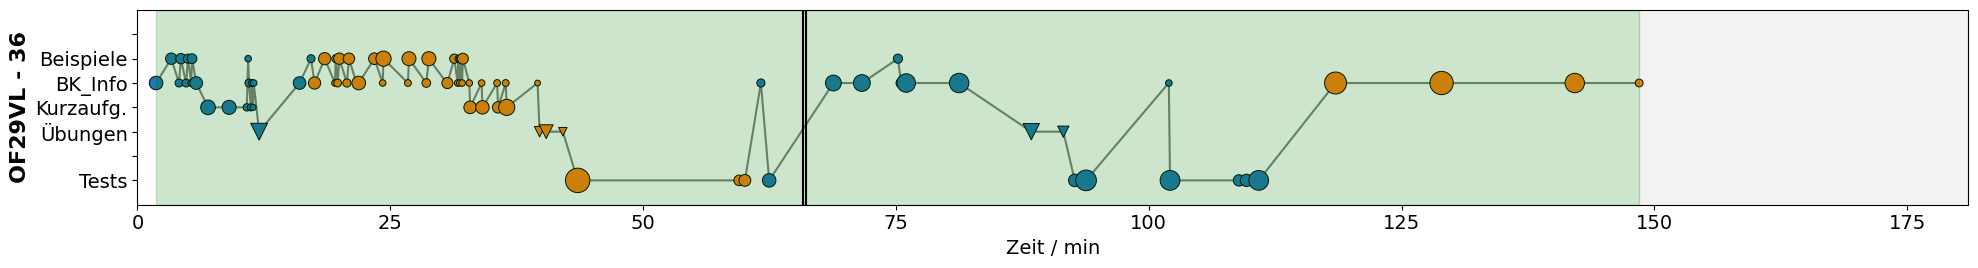

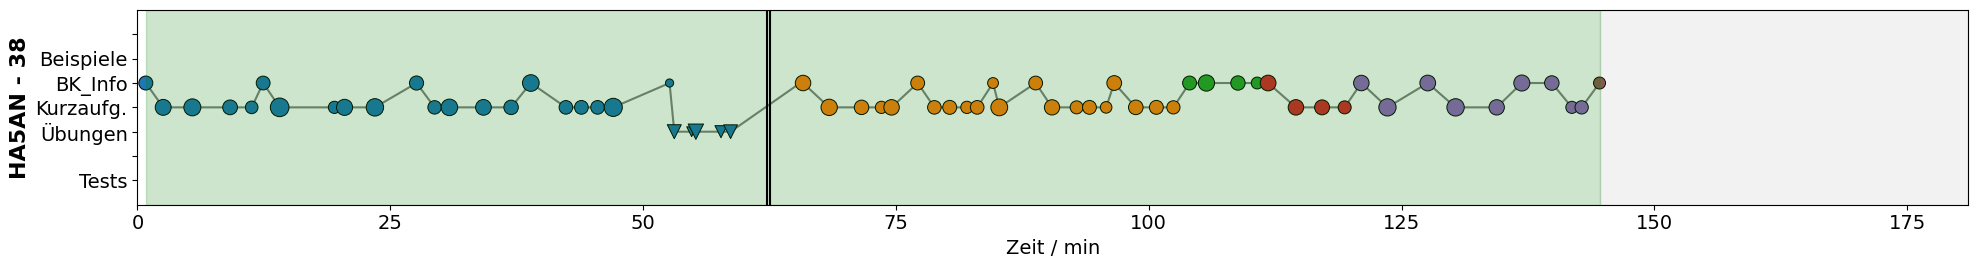

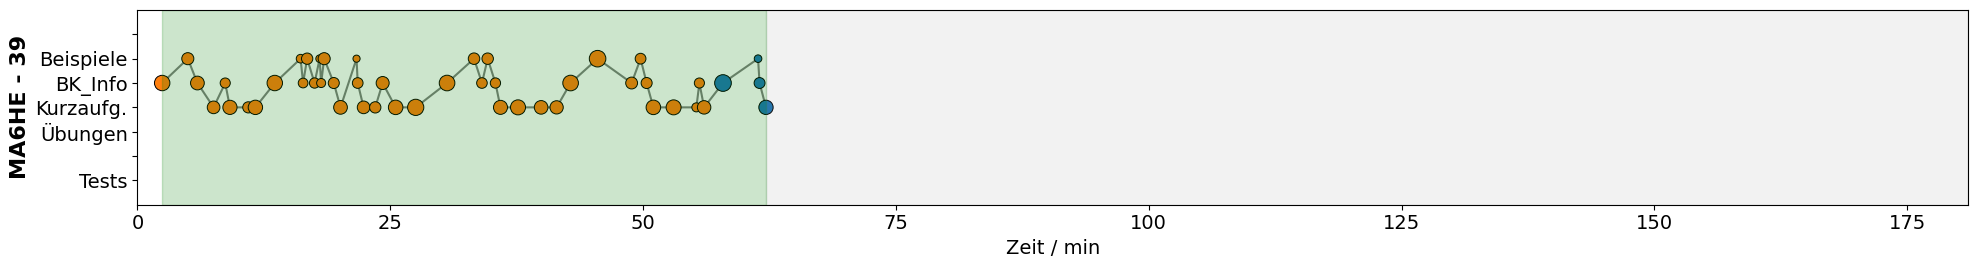

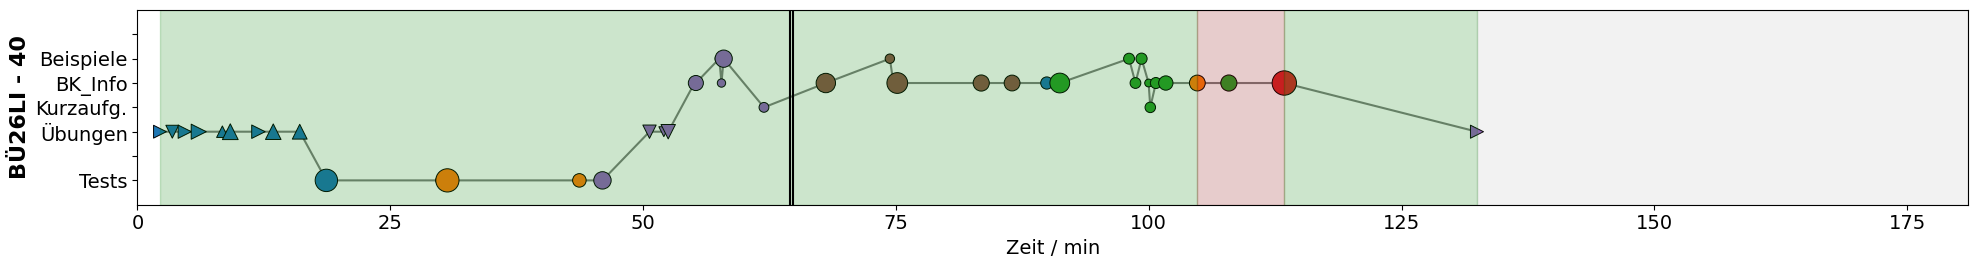

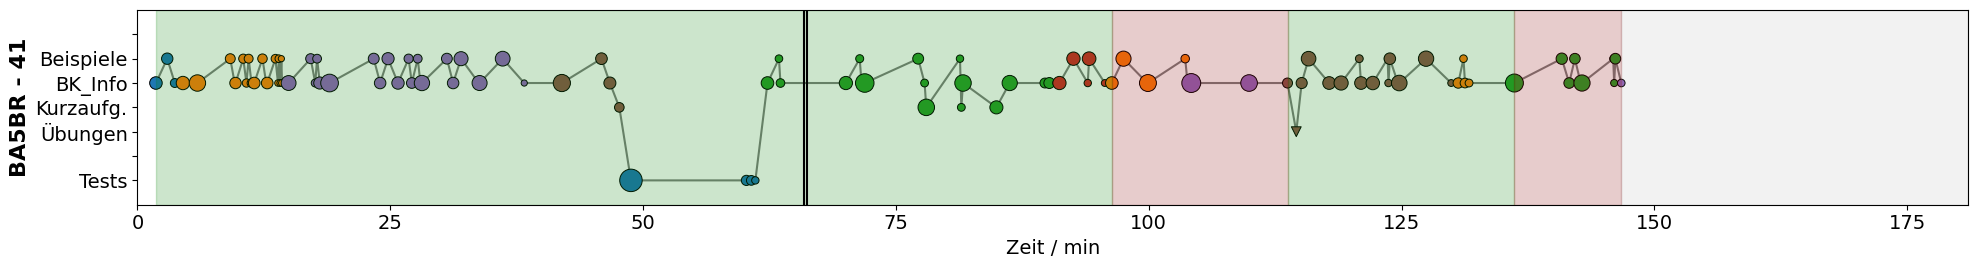

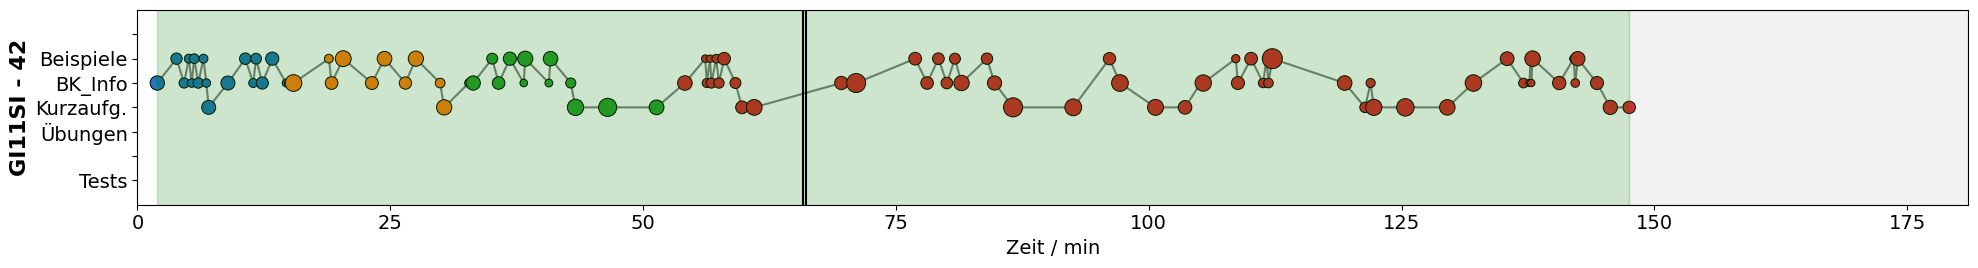

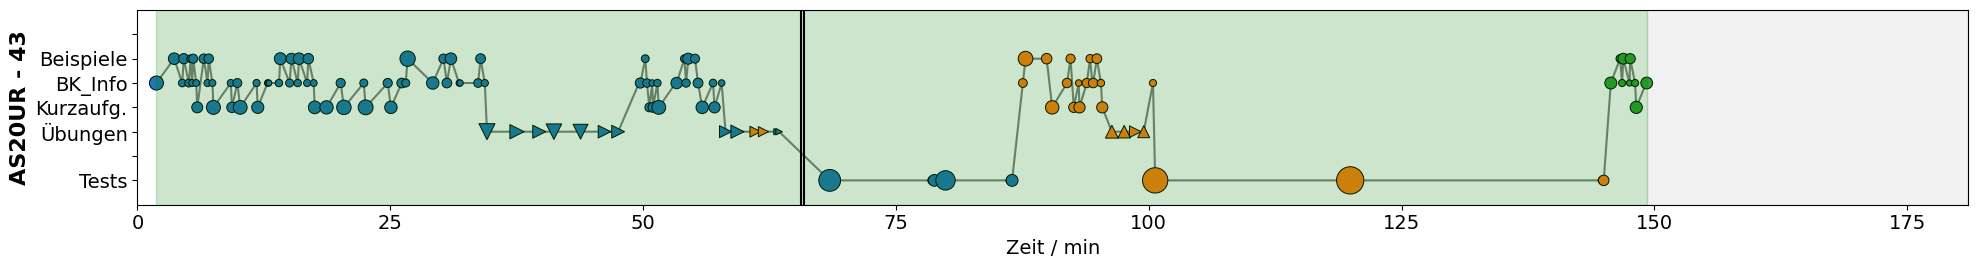

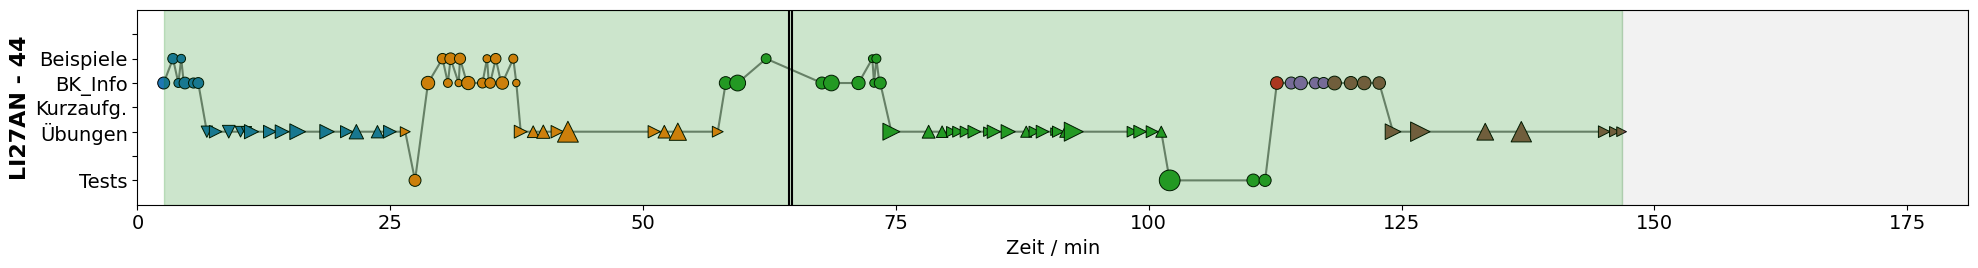

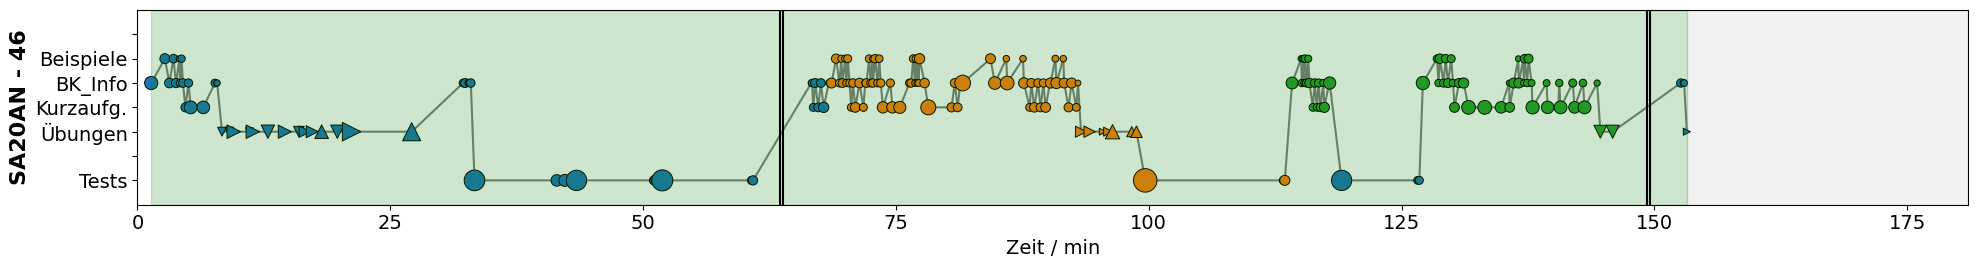

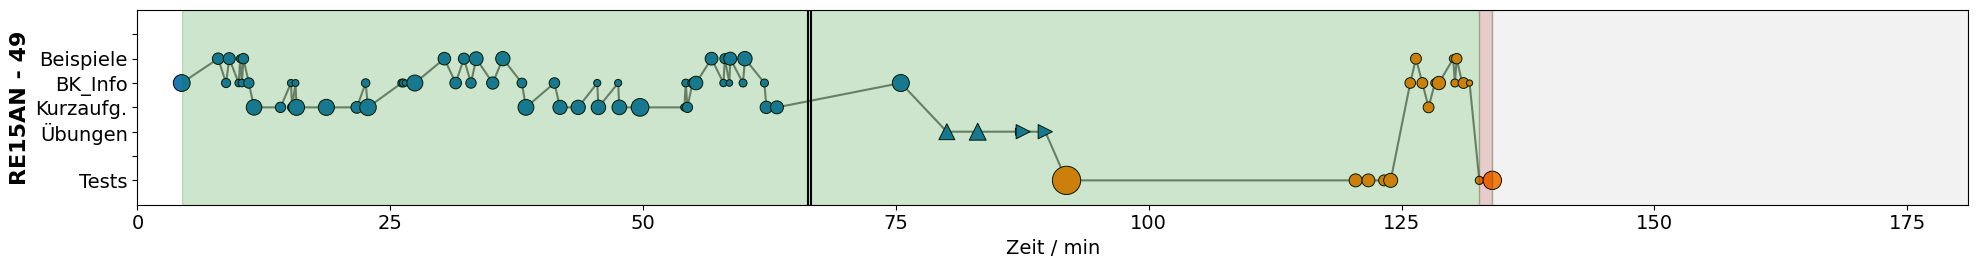

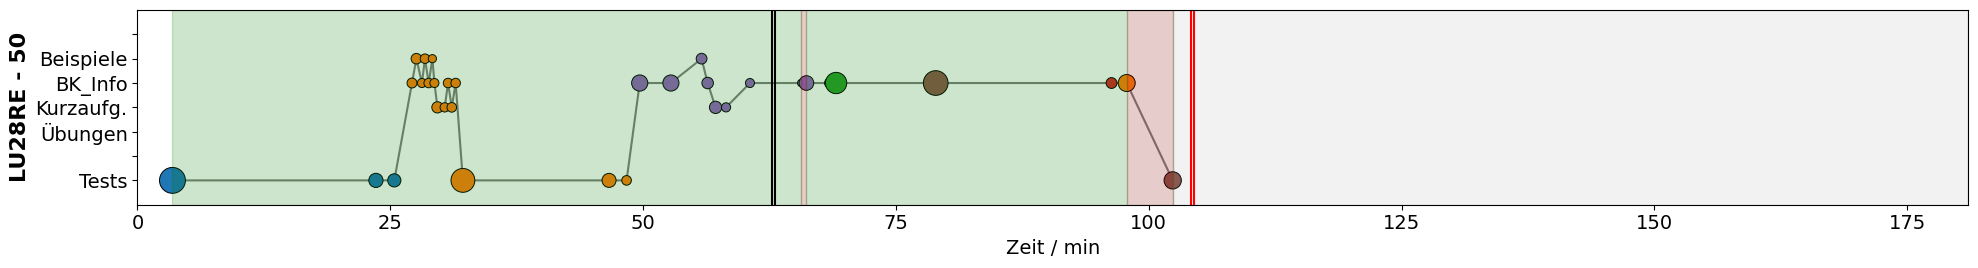

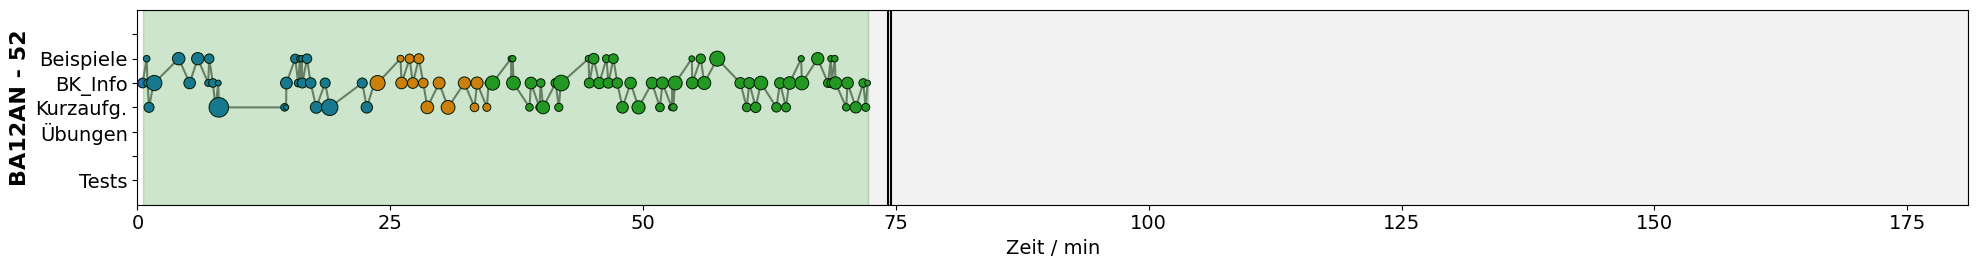

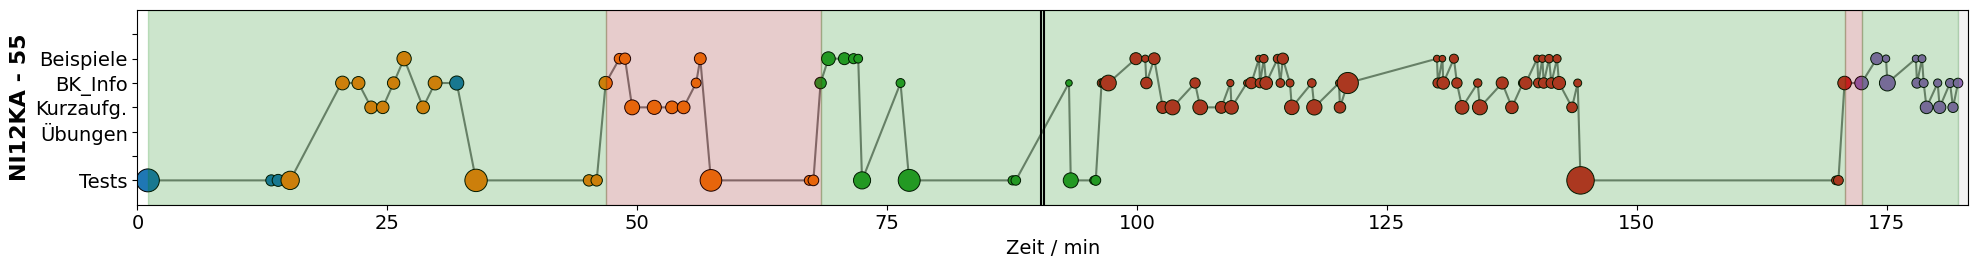

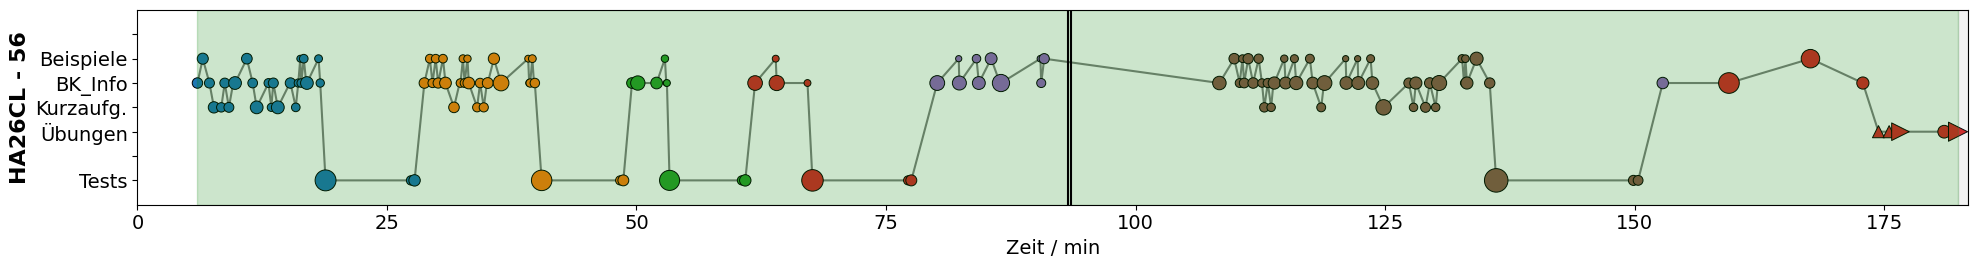

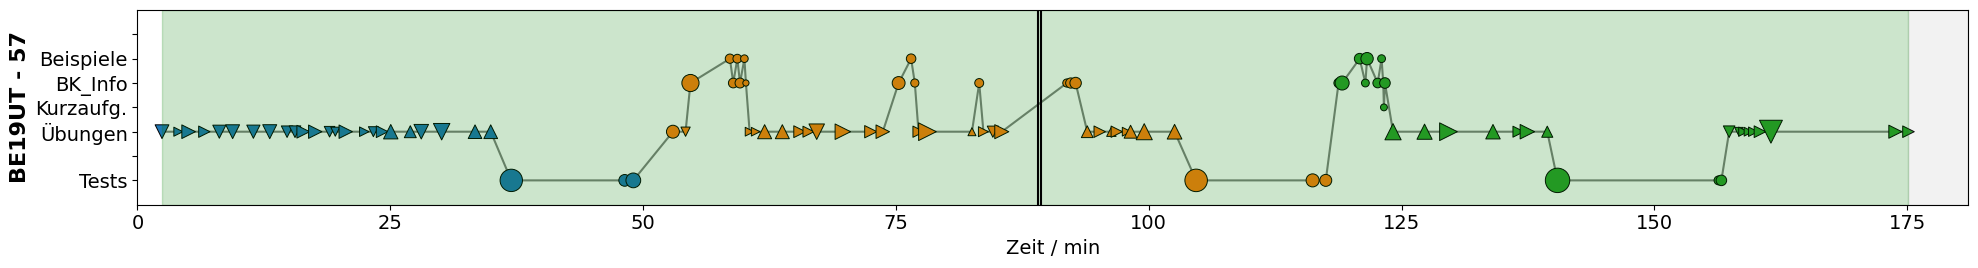

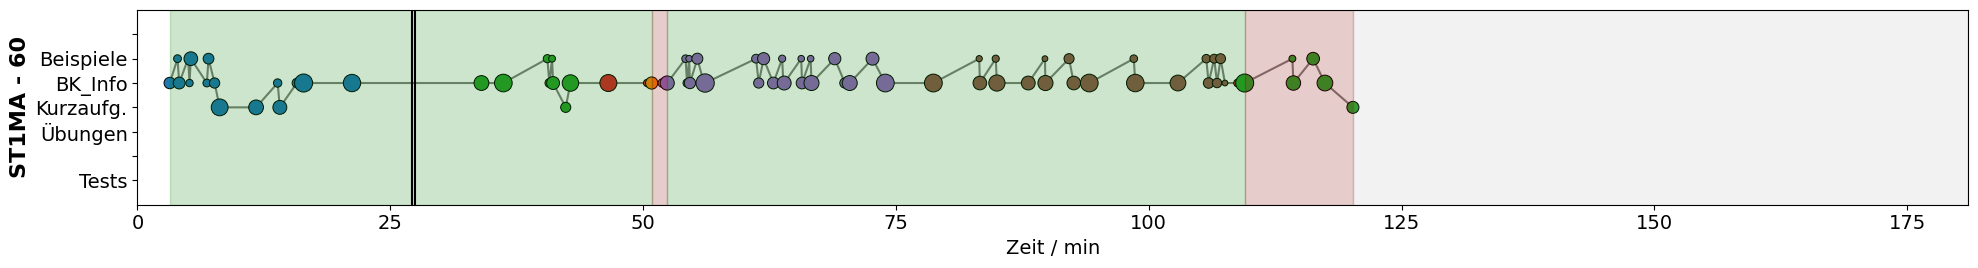

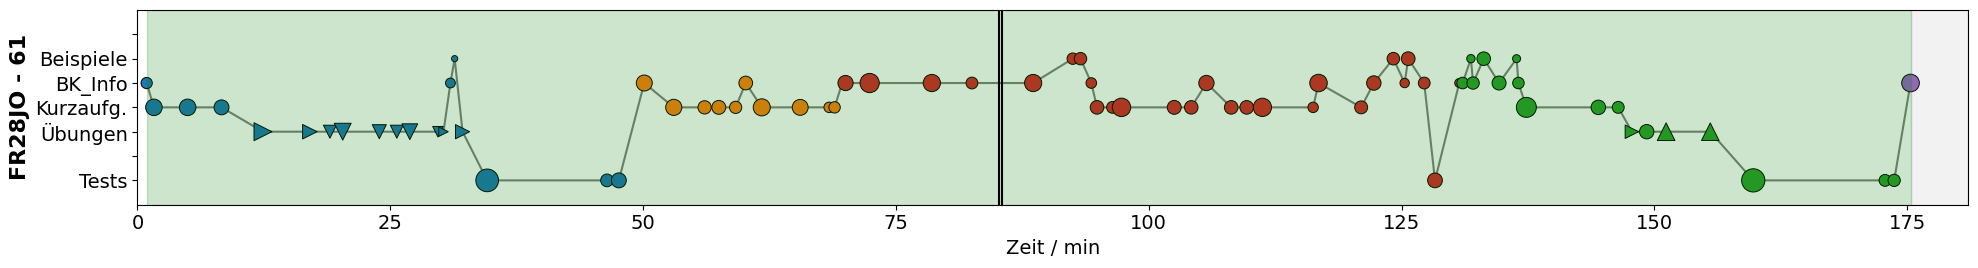

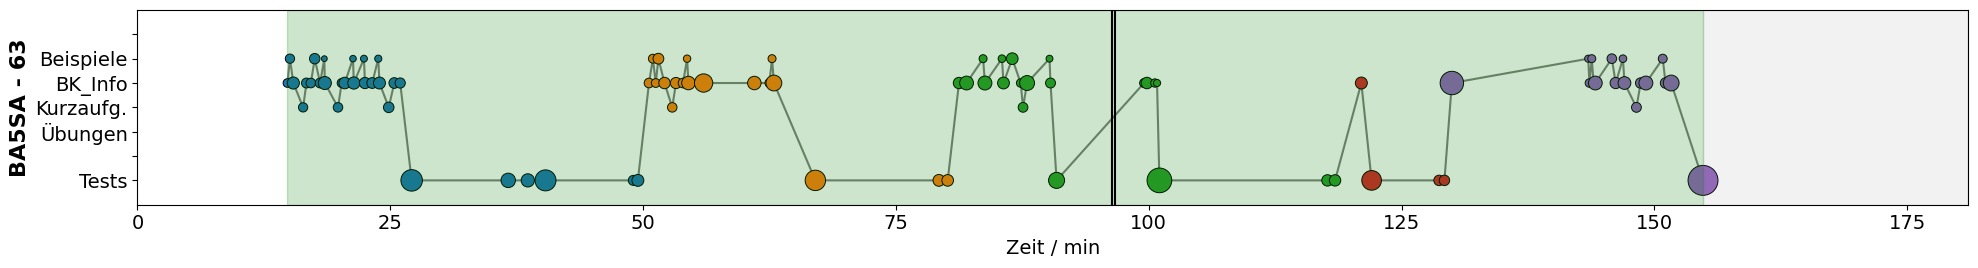

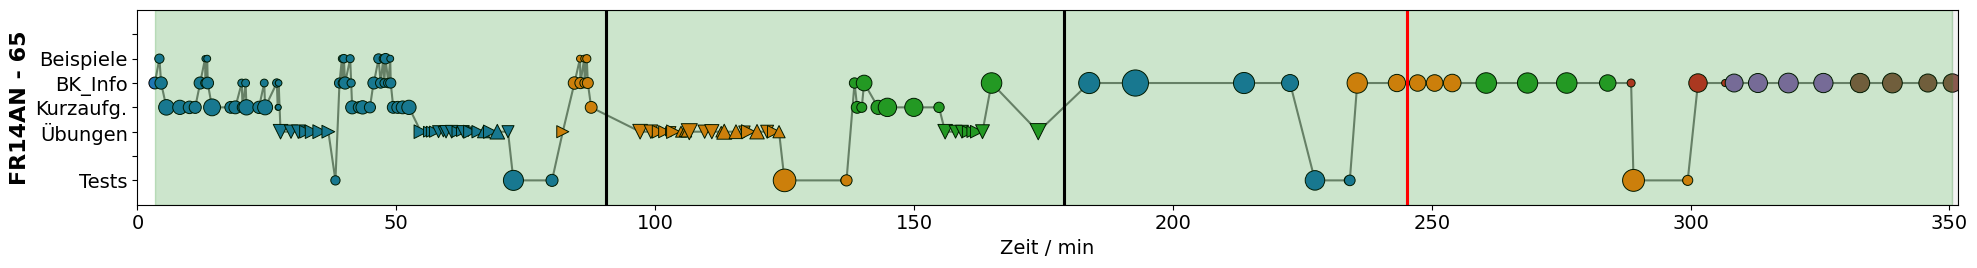

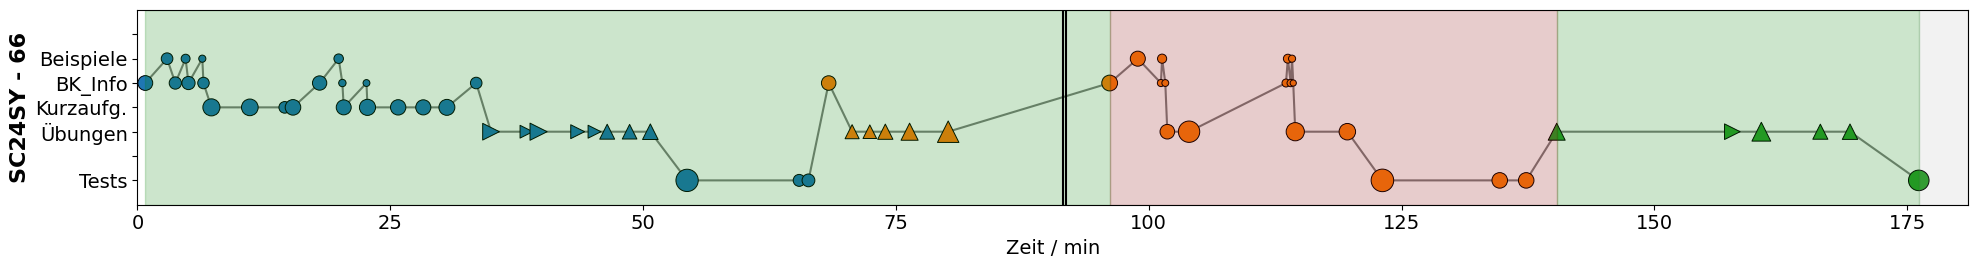

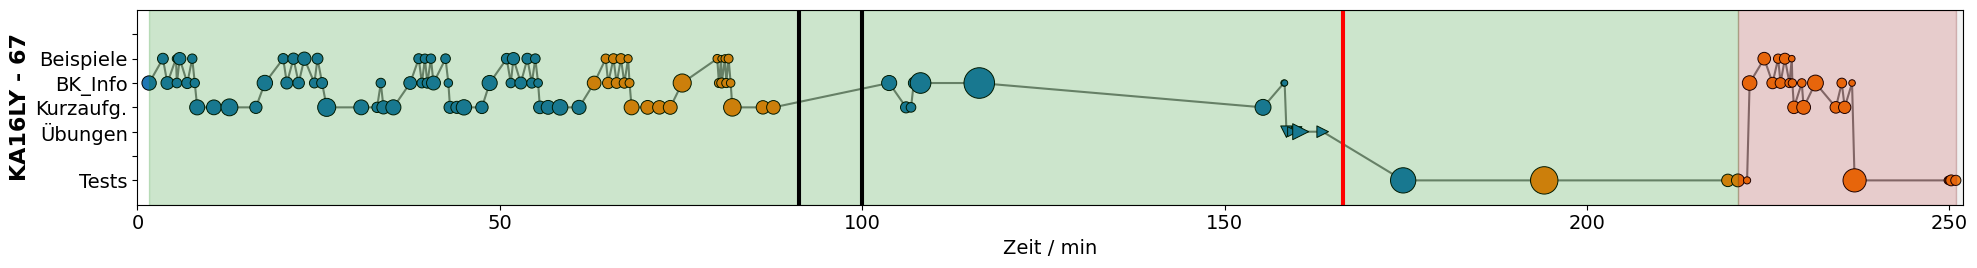

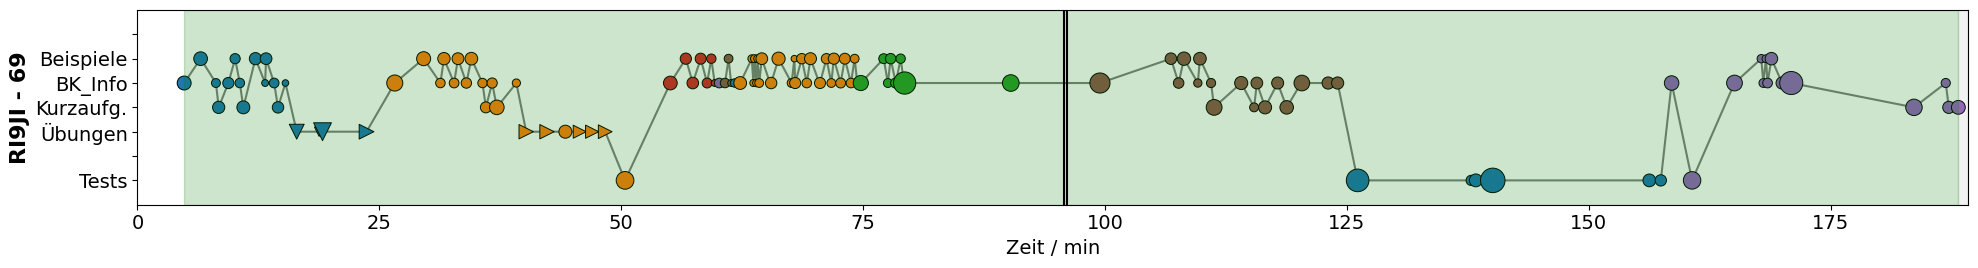

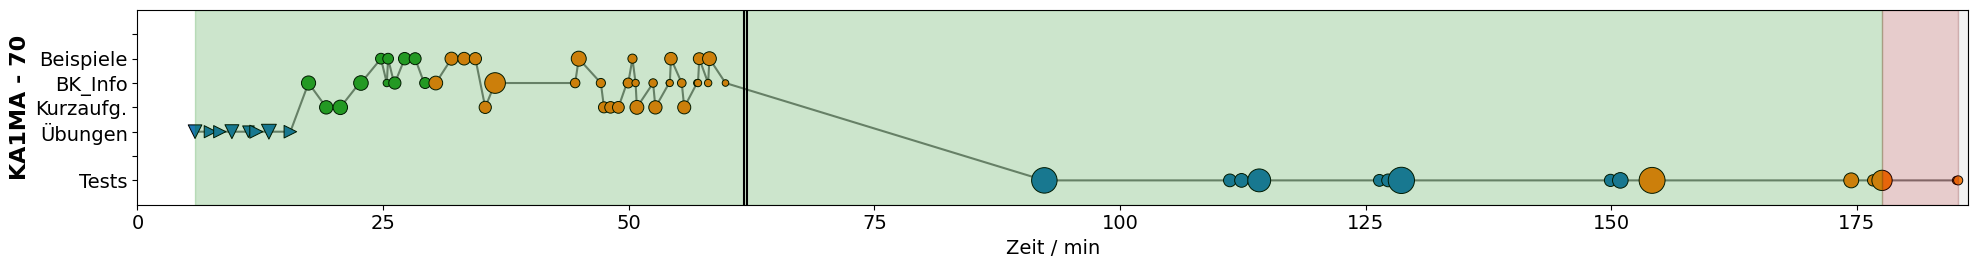

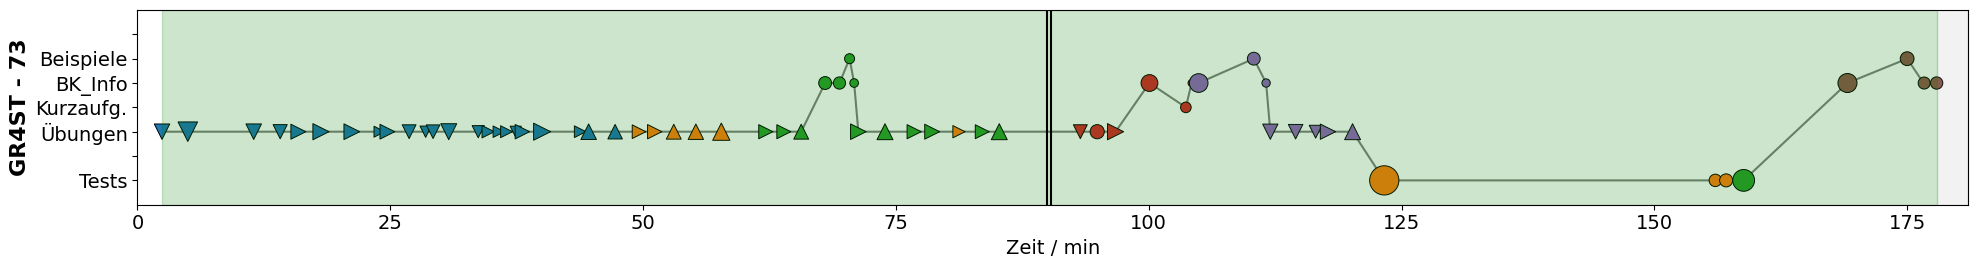

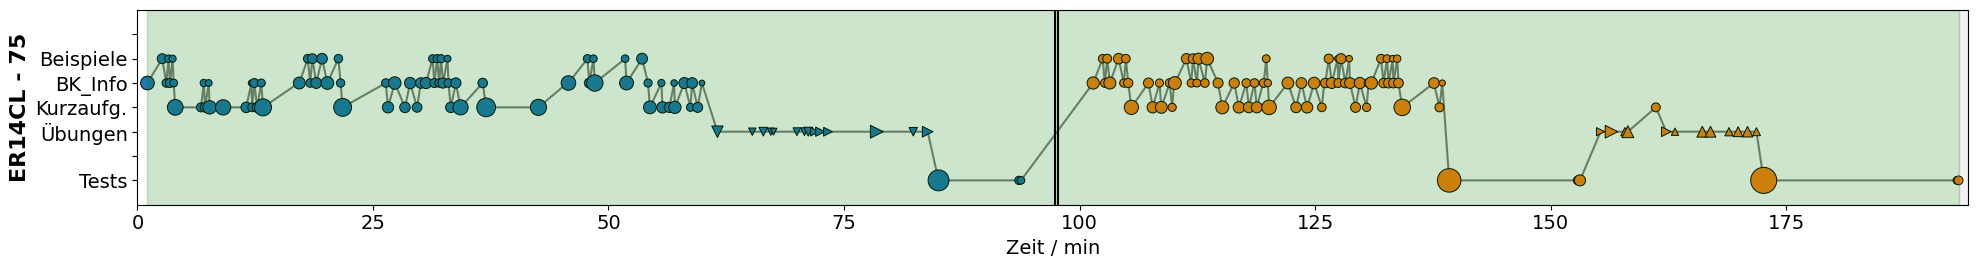

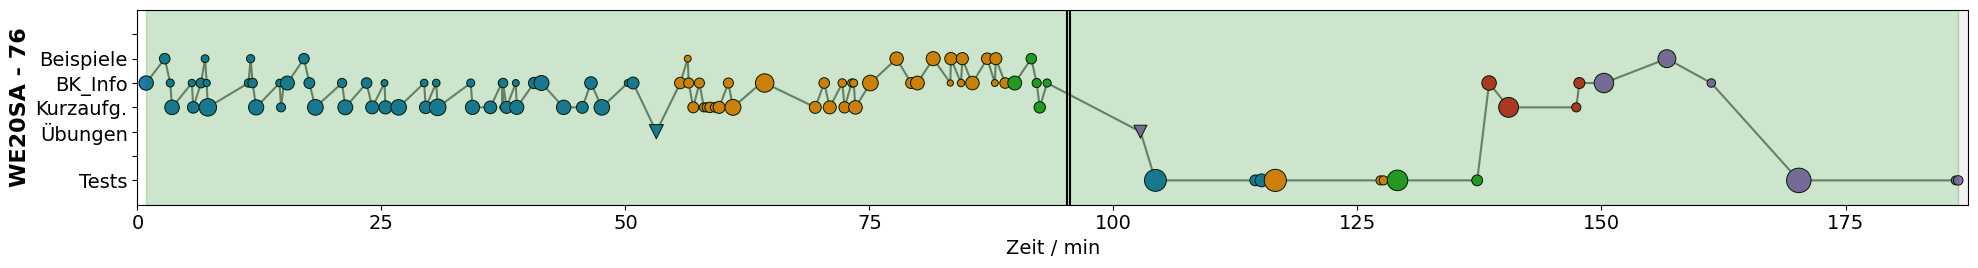

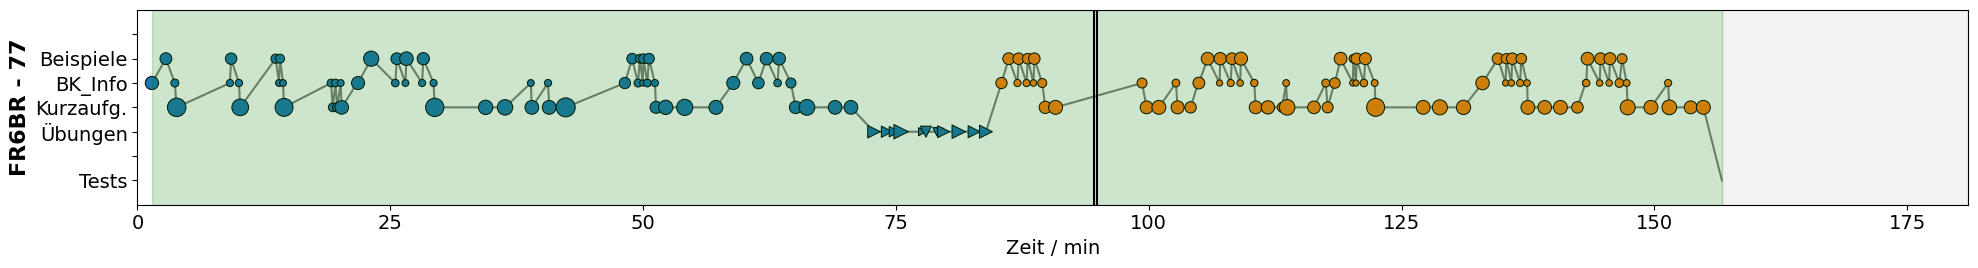

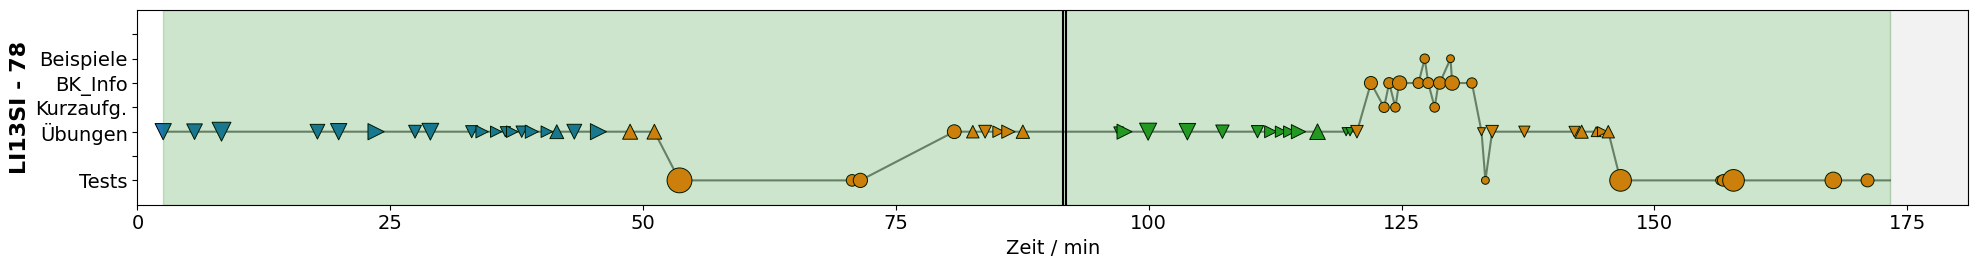

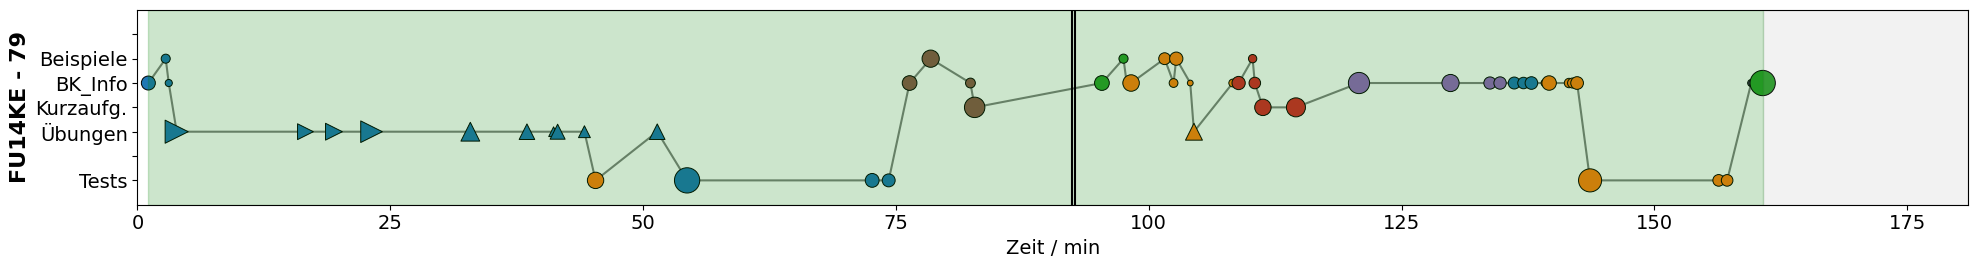

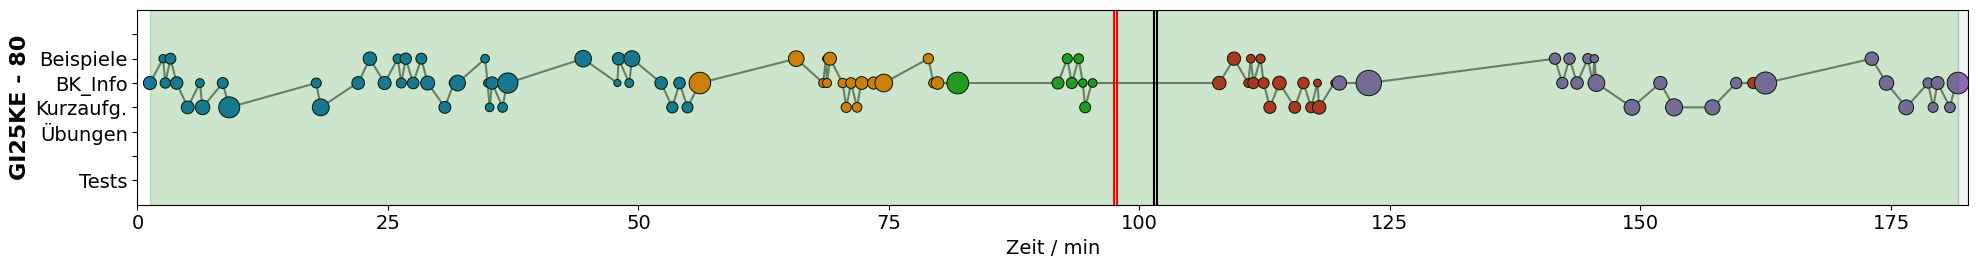

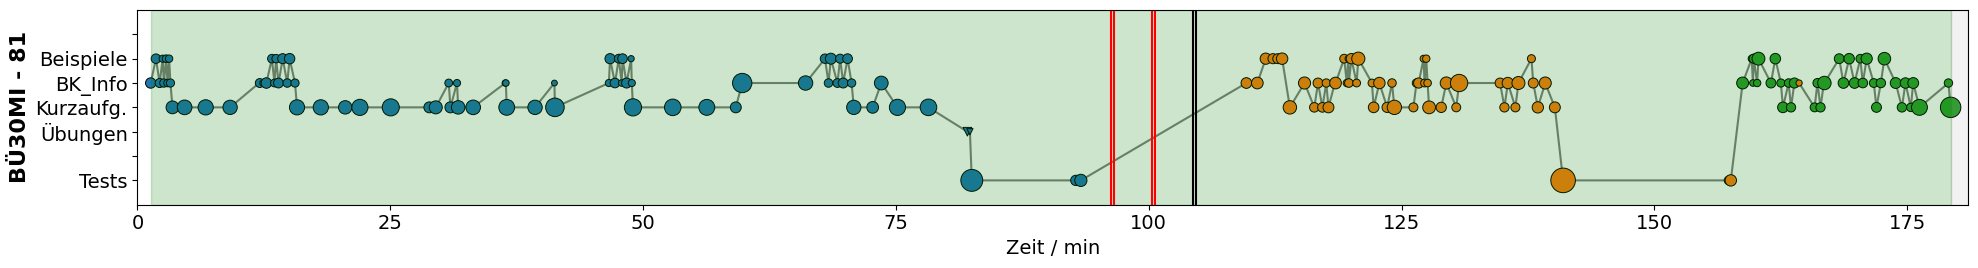

In [61]:
learntypes = [[0], [2], [3], [5], [4]]
spath = os.path.join(results_path, 'Lineplots')
figs7 = learn_types_lineplots(save=save, silent=True, file_extension='simple',
                              path=spath, dpi=300, learntypes=learntypes,
                              max_user=n)

In [62]:
# With this all lineplots might be saved in one pdf, with lernerfolg annotated:

features = merge_pers_feature(rm_incomplete_user=False, fill_na=True)
annots = features[['User', 'LE', 'LEN1', 'LEN2', 'LEN3']]

for i in range(len(figs7)):
    user = int(figs7[i][1].yaxis.label.get_text().split()[-1])
    if user in annots['User'].values:
        le = annots.loc[annots.User == user, 'LE'].values[0]
        le1 = annots.loc[annots.User == user, 'LEN1'].values[0]
        le2 = annots.loc[annots.User == user, 'LEN2'].values[0]
        le3 = annots.loc[annots.User == user, 'LEN3'].values[0]
        text = f'Lernerfolg: Gesamt: {le:.2f} | Newton 1: {le1:.2f} | Newton 2: {le2:.2f} | Newton 3: {le3:.2f}'
    else:
        text = f'Lernerfolg unbekannt, Tests unvollständig'
    figs7[i][1].annotate(text, xy=(20, 8), xycoords='figure pixels', fontweight='bold')
    
filename = os.path.join(results_path, 'lineplots_mit_lernerfolg.pdf')
pdf = matplotlib.backends.backend_pdf.PdfPages(filename)
for fig in [entry[0] for entry in figs7]:
    pdf.savefig(fig)
    
pdf.close()

Finished merging data_prep and person_features, created ROOT/raw_data/data_prep_with_personal.csv


### Significant Correlation Heatmaps

In [ ]:
kwargs = dict(method='pearson', p_threshold=5, min_cor=0, cor_threshold=0.8)

warnings.filterwarnings("ignore")
spath = os.path.join(results_path, 'Heatmaps')

df = load_data('data_prep.csv')
fig8, _ = significant_corrs_heatmap(df=df, save=save, path=spath, **kwargs)

### String Similarity Clustermap

In [ ]:
grid = string_ratio_grid(save=save)

### Summary of Feature influences on Learn Success

In [ ]:
moderators1 = get_success_moderators(diff='RF_Diff', save=True)
fig9, _ = summarize_feature_influences(moderators1)

moderators2 = get_success_moderators(diff='NSt_Diff', save=True)
fig10, _ = summarize_feature_influences(moderators2)

### Dependencies of Person Features

In [ ]:
from cluster.cluster_plot_fcts import correlation_heatmap

for col in [
    "NSt_Pre",
    "NSt_Post",
    "NSt_Diff",
    "SWJK",
    "Note",
    "SWK",
    "FSK",
    "AV",
    "ALZO",
    "VLZO",
    "LZO",
    "Inte",
    "KLO",
    "KLW",
    "MKL",
    "RZM",
    "RSA",
    "RAK",
    "RF_Pre",
    "RF_Post",
    "RF_Diff",
]:
    correlation_heatmap(
        df=None,
        min_cor=0,
        plot_corr=False,
        pvalues=False,
        save=True,
        max_cor=1,
        threshold=10,
        features=[col],
        all_with_these_features=True,
        filename=col
    )